In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 65s 0us/step


(50000, 32, 32, 3)

In [14]:
X_test.shape


(10000, 32, 32, 3)

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [18]:
classes[9]

'truck'

In [21]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

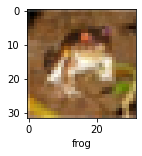

In [22]:
plot_sample(X_train, y_train, 0)

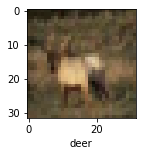

In [25]:
plot_sample(X_train, y_train,3)

In [28]:
X_train = X_train/255
X_test = X_test/255


In [32]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation ='relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation= 'sigmoid')
])

ann.compile(optimizer =  'SGD',
           loss= 'sparse_categorical_crossentropy', 
           metrics ='accuracy')
ann.fit(X_train, y_train, epochs =5)

Epoch 1/5
1563/1563 [==============================] - 121s 78ms/step - loss: 1.8596 - accuracy: 0.3344
Epoch 2/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.6569 - accuracy: 0.4135
Epoch 3/5
1563/1563 [==============================] - 123s 79ms/step - loss: 1.5691 - accuracy: 0.4427
Epoch 4/5
1563/1563 [==============================] - 132s 85ms/step - loss: 1.5103 - accuracy: 0.4664
Epoch 5/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4606 - accuracy: 0.4834


In [33]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.5023 - accuracy: 0.4668


[1.5022555589675903, 0.4668000042438507]

In [37]:
from sklearn.metrics import confusion_matrix, classification_report 
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report (y_test, y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.42      0.60      0.50      1000
           1       0.65      0.47      0.55      1000
           2       0.37      0.34      0.36      1000
           3       0.40      0.25      0.31      1000
           4       0.43      0.40      0.41      1000
           5       0.46      0.29      0.35      1000
           6       0.45      0.67      0.54      1000
           7       0.62      0.47      0.53      1000
           8       0.42      0.78      0.54      1000
           9       0.64      0.40      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [43]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation ='relu'),
    layers.Dense(10, activation = 'sigmoid')
    #layers.Dense(10, activation= 'sigmoid')
])
    

In [45]:
cnn.compile(optimizer =  'adam',
           loss= 'sparse_categorical_crossentropy', 
           metrics ='accuracy')


In [47]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5362 - accuracy: 0.4453
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.2092 - accuracy: 0.5764
Epoch 3/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0932 - accuracy: 0.6171
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0166 - accuracy: 0.6465
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9648 - accuracy: 0.6632
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9170 - accuracy: 0.6805
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8814 - accuracy: 0.6930
Epoch 8/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8460 - accuracy: 0.7056
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8194 - accuracy: 0.7152
Epoch 10/10
1563/1563 [==============================] - 46s 29m

In [48]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.9286 - accuracy: 0.6863 3s - loss: 0.9305 - ac - ETA: 2s - loss: 0.9206 - accu - ETA: 2s - loss: 0.9215 - accu - E - ETA: 0s - loss: 0.9248 


[0.9285525679588318, 0.6862999796867371]

In [50]:
y_test= y_test.reshape(-1,)

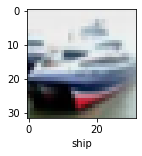

In [51]:
plot_sample(X_test, y_test,1)

In [52]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.5857878e-06, 8.8738233e-07, 6.0905259e-05, 1.8344700e-02,
        2.6055675e-05, 4.0855408e-03, 3.0994415e-04, 3.1036939e-06,
        5.7137012e-04, 3.1601162e-06],
       [5.6865811e-04, 7.4693561e-04, 1.5098978e-05, 9.0433997e-07,
        8.5432367e-07, 3.5798307e-09, 1.3729412e-08, 2.1787692e-09,
        3.4568518e-02, 7.1810209e-05],
       [1.5448034e-03, 3.5856366e-03, 1.2193470e-04, 1.3458729e-04,
        8.0479935e-05, 1.7096221e-05, 7.0692579e-07, 1.2507577e-05,
        4.5535505e-02, 1.6766787e-04],
       [1.0394931e-02, 1.1183918e-03, 1.3840199e-04, 1.8041665e-05,
        4.3147662e-05, 1.3502869e-07, 6.6537780e-07, 2.9543509e-07,
        7.2135925e-03, 1.3546808e-06],
       [2.4564791e-08, 1.3003173e-06, 3.4749508e-04, 8.8742375e-04,
        1.5827149e-02, 2.9113889e-04, 1.0233939e-02, 2.0803182e-06,
        3.0938043e-07, 2.1373108e-07]], dtype=float32)

In [54]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [55]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

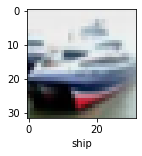

In [56]:
plot_sample(X_test, y_test,1)

In [58]:
classes[y_classes[1]]

'ship'